**Names**: Connor McHugh and Luis Martinez

# Necesarry Libraries


In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, mean_absolute_percentage_error
import xgboost as xgb

# Summary Statistics and Graphs

In [ ]:
df = pd.read_csv("medical_insurance.csv")

In [ ]:
df.head()

,age,gender,bmi,children,smoker,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,no,northwest,3866.86,77.3372


In [ ]:
df.tail()

,age,gender,bmi,children,smoker,discount_eligibility,region,expenses,premium
1333,50,male,31.0,3,no,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,no,southwest,2007.95,20.0795
1337,61,female,29.1,0,yes,yes,northwest,29141.36,1165.6544


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   smoker                1338 non-null   object 
 5   discount_eligibility  1338 non-null   object 
 6   region                1338 non-null   object 
 7   expenses              1338 non-null   float64
 8   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.2+ KB


In [ ]:
df.describe(include='all')

,age,gender,bmi,children,smoker,discount_eligibility,region,expenses,premium
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000
unique,NaN,2,NaN,NaN,2,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,no,southeast,NaN,NaN
freq,NaN,676,NaN,NaN,1064,1064,364,NaN,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,NaN,13270.422414,262.874685
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,NaN,12110.011240,292.532178
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,1121.870000,11.218700
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,NaN,4740.287500,87.354250
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.030000,174.997400
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,NaN,16639.915000,342.908900


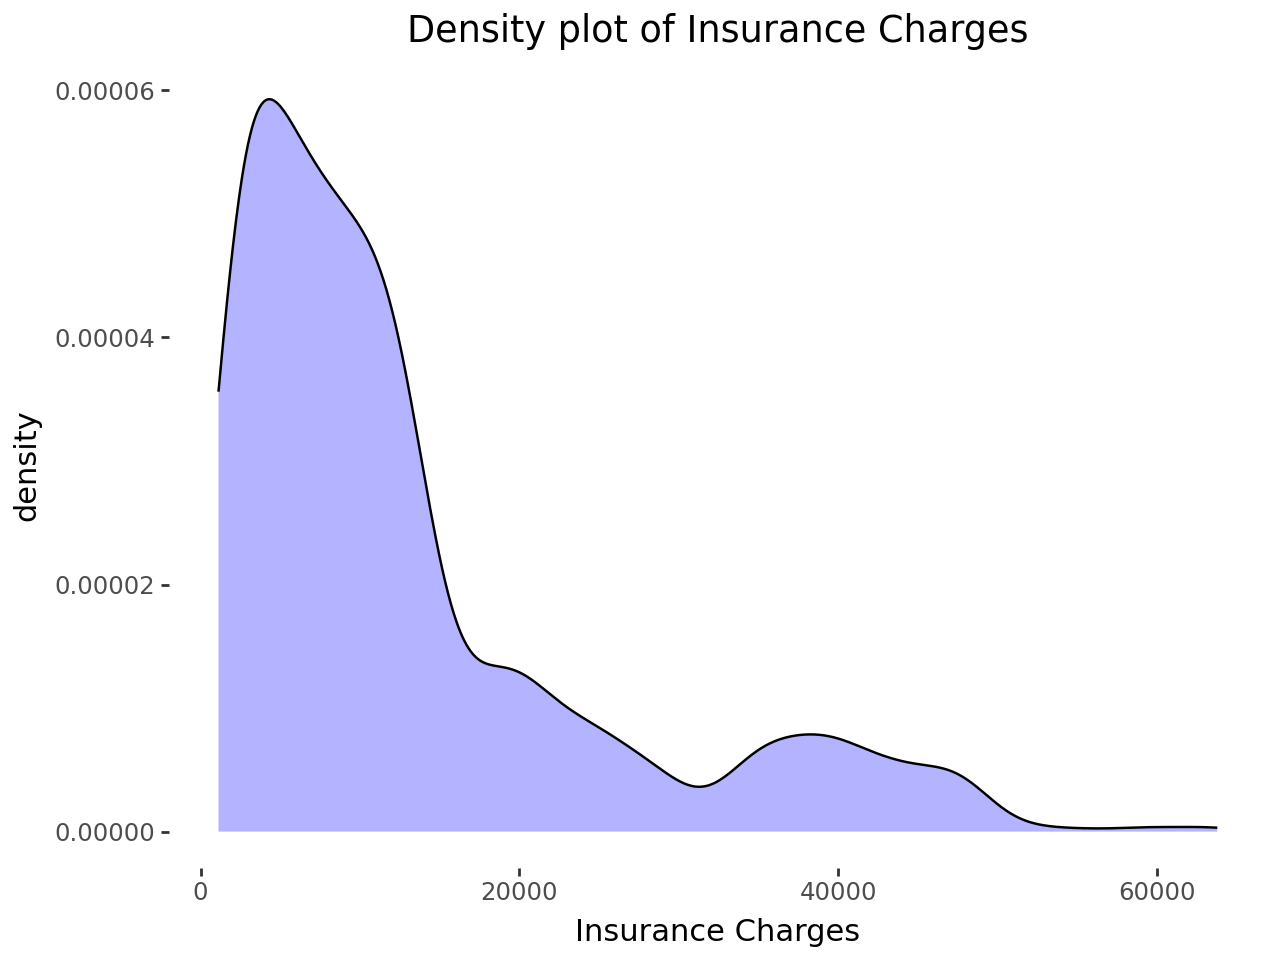

In [ ]:
g_1 = (
    ggplot(df,
           aes(x="expenses"))
    + geom_density(fill="blue", alpha=0.3)
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
    )
    + labs(x="Insurance Charges", title="Density plot of Insurance Charges")
)
g_1

In [ ]:
df['log_expenses'] = np.log(df['expenses'] + 1)
df['log_expenses'].describe()

,log_expenses
count,1338.000000
mean,9.098828
std,0.919379
min,7.023643
25%,8.464064
50%,9.146658
75%,9.719618
max,11.063061


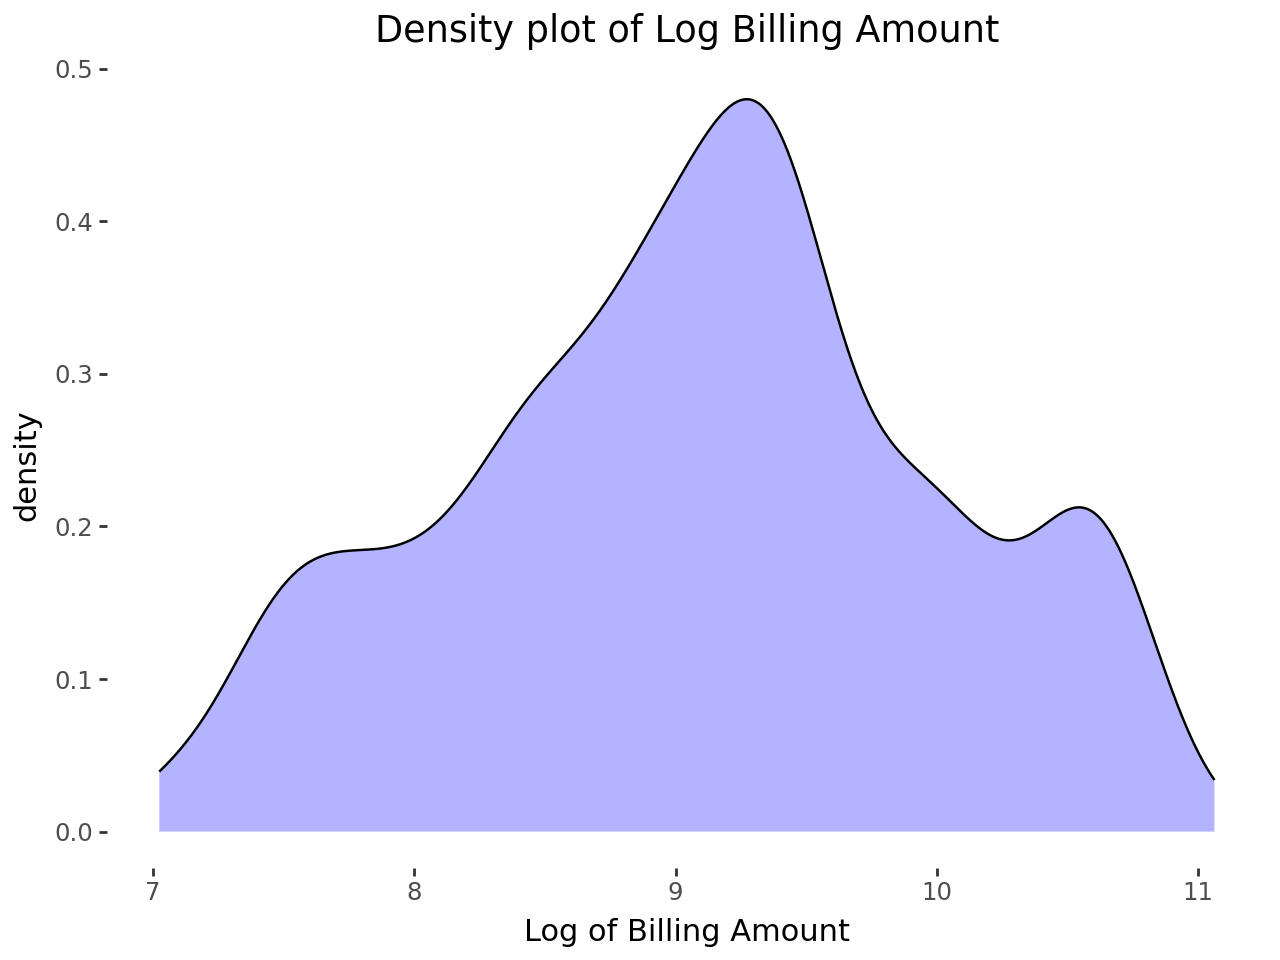

In [ ]:
graph_0 = (
    ggplot(df,
           aes(x="log_expenses"))
    + geom_density(fill="blue", alpha=0.3)
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
    )
    + labs(x="Log of Billing Amount", title="Density plot of Log Billing Amount")
)
display(g_2)

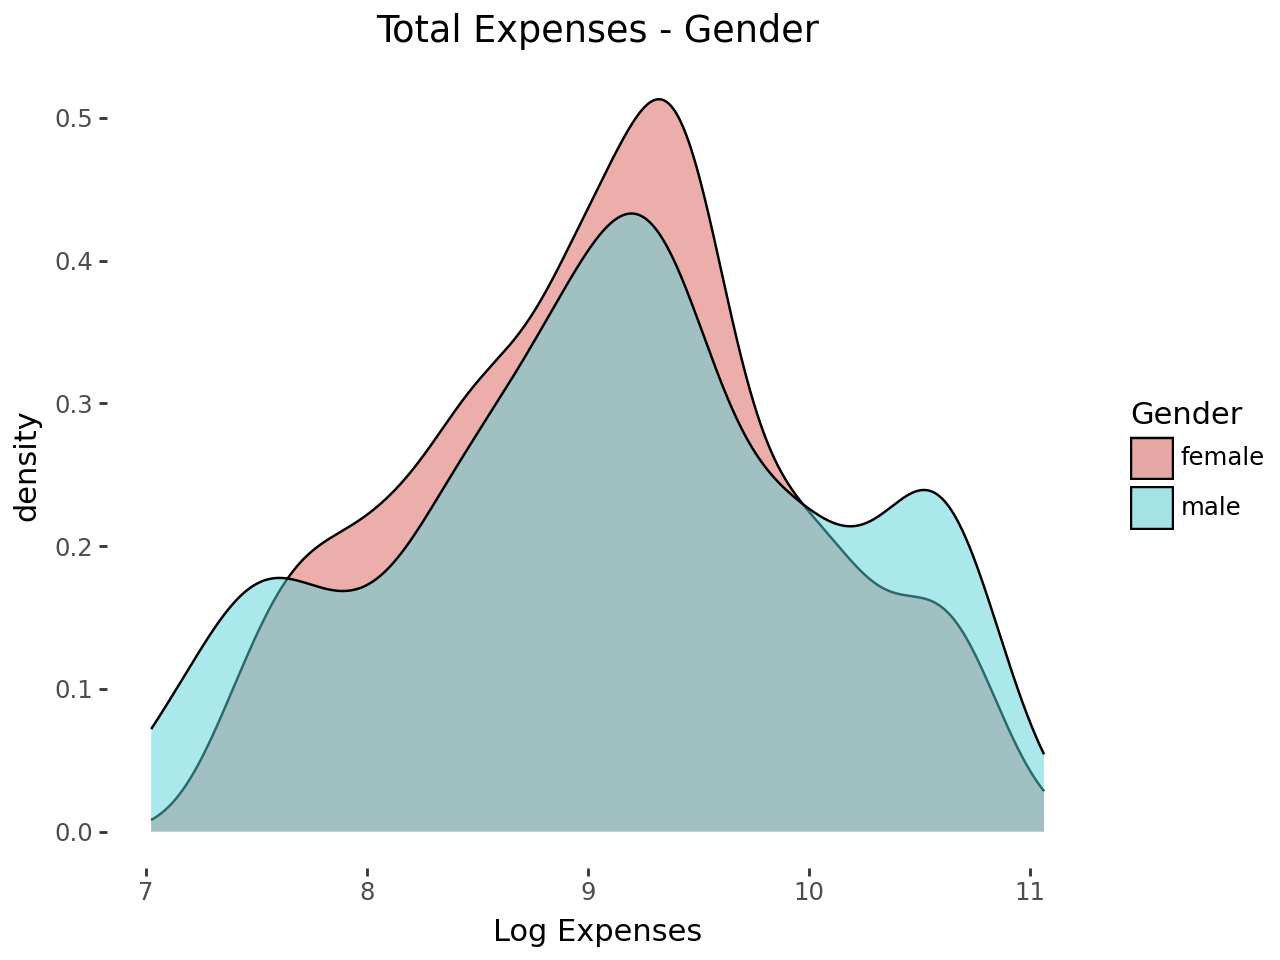

In [ ]:
grpah_1 = (
    ggplot(data = df, mapping = aes(x = 'log_expenses', fill = 'gender'))
    + geom_density(alpha=0.5)
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank()
    )
    + labs(
        x="Log Expenses",
        title="Total Expenses - Gender",
        fill="Gender"
    )
)
display(grpah_1)

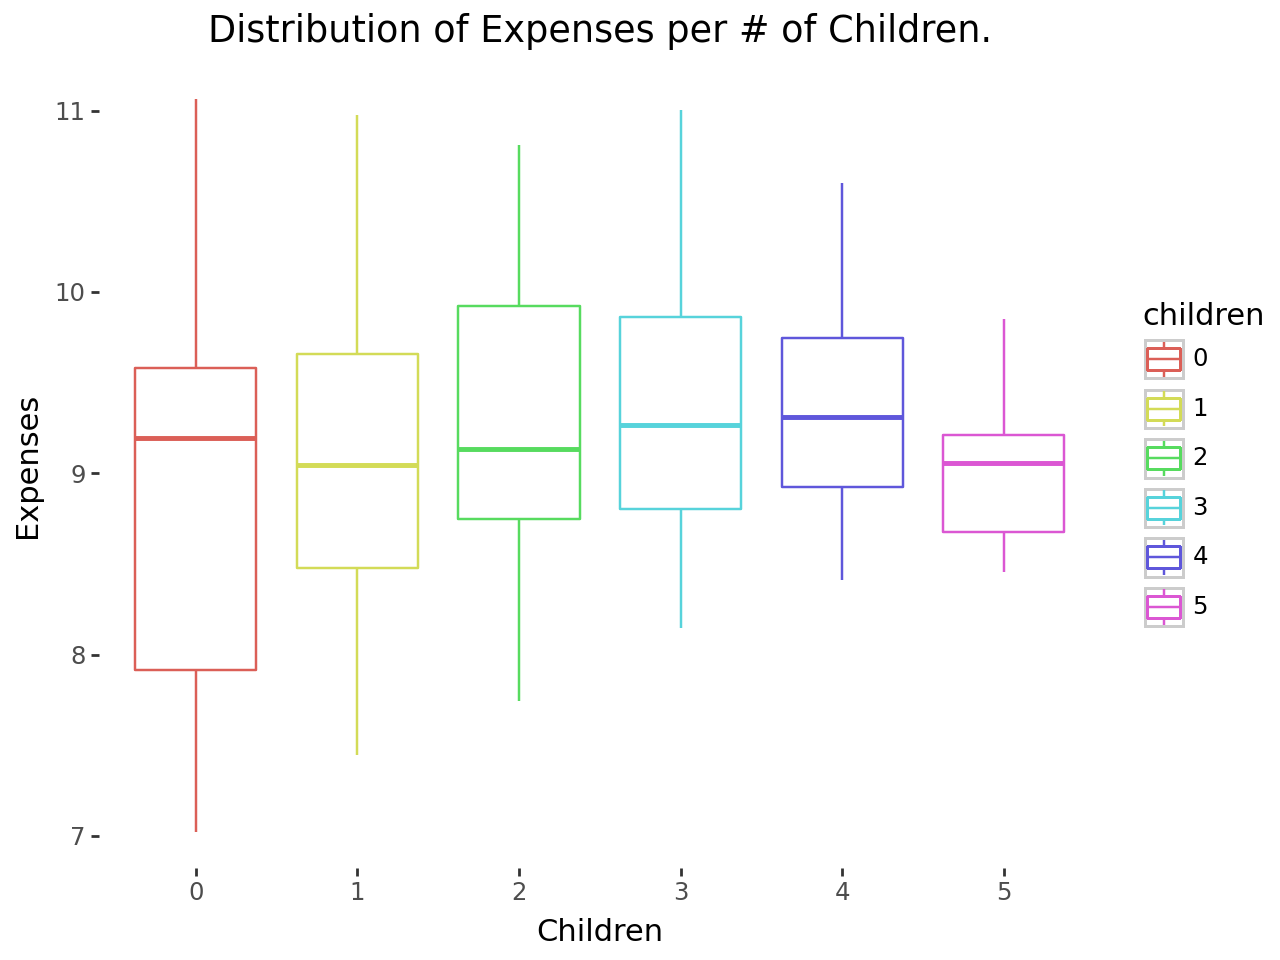

In [ ]:
plot_data = df.copy()
plot_data['children'] = plot_data['children'].astype(str)
graph_2 = (
     ggplot(plot_data, mapping = aes(x = 'children', y = 'log_expenses', color = 'children'))
    + geom_boxplot()
        + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
    )
    + labs(
           x="Children",
            y = "Expenses",
            title="Distribution of Expenses per # of Children."
    )
)
graph_2

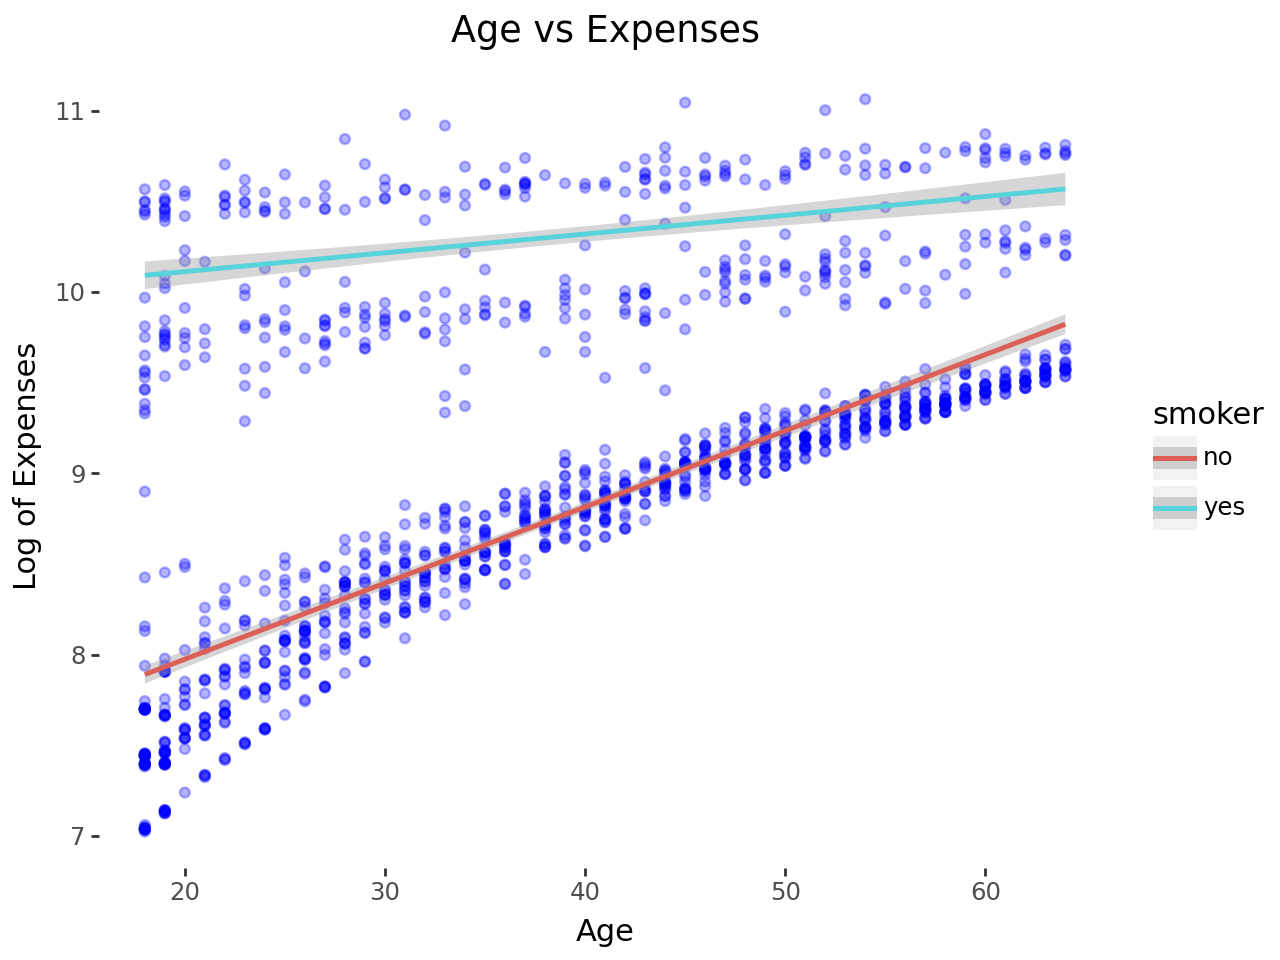

In [ ]:
graph_3 = (
    ggplot(data = df, mapping = aes(x = 'age', y = 'log_expenses', color = 'smoker'))
    + geom_point(color = 'blue', alpha = 0.3)
    + geom_smooth(method = 'lm')
        + theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
    )
    + labs(
           x="Age",
            y = "Log of Expenses",
            title="Age vs Expenses"
    )
)
display(graph_3)

# **Models**


## **Linear Regression via OLS**

### Data Preparation and Initial Model

In [ ]:
df.drop(['premium', 'log_expenses'], axis = 1, inplace=True)

In this code chunck we utilize all terms with no interaction terms to see an initial performance.

In [ ]:
first_model = smf.ols('expenses ~ age + gender + bmi + children + smoker + discount_eligibility + region', data = df).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:48:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.194e+04    987.811    -12.089      0.000   -1.39e+04      -1e+04
gender[T.male]               -131.3520    332.935     -0.395      0.693    -784.488     521.784
smoker[T.yes]                1.192e+04    206.570     57.723      0.000    1.15e+04    1.23e+04
discount_eligibility[T.yes]  1.192e+04    206.570     57.723      0.000    1.15e+04    1.23e+04
region[T.northwest]          -352.7901    476.261     -0.741      0.459   -1287.095     581.515
region[T.southeast]         -1035.5957    478.681     -2.163      0.031   -1974.648     -96.544
region[T.southwest]          -959.3058    477.912     -2.007      0.045   -1896.850     -21.762
age                           256.8392     11.899     21.586      0.000     233.497     280.181
bmi                           339.2899     28.598     11.864      0.000     283.187     395.393
children                      475.6889    137.800      3.452      0.001     205.360     746.017
==============================================================================
Omnibus:                      300.499   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.382
Skew:                           1.212   Prob(JB):                    6.14e-157
Kurtosis:                       5.652   Cond. No.                     2.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now we proceed to find out all the possible interactions between all the features.

In [ ]:
second_model = smf.ols('expenses ~ age * gender * bmi * children * smoker * discount_eligibility * region', data=df).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     56.61
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:55:14   Log-Likelihood:                -13181.
No. Observations:                1338   AIC:                         2.662e+04
Df Residuals:                    1210   BIC:                         2.728e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     -8976.2145   7754.998     -1.157      0.247   -2.42e+04    6238.521
gender[T.male]                                                                                 2851.2755    1.1e+04      0.259      0.796   -1.87e+04    2.45e+04
smoker[T.yes]                                                                                 -4385.6136   8038.870     -0.546      0.585   -2.02e+04    1.14e+04
discount_eligibility[T.yes]                                                                   -4385.6136   8038.870     -0.546      0.585   -2.02e+04    1.14e+04
region[T.northwest]                                                                             999.9496    1.2e+04      0.083      0.934   -2.26e+04    2.46e+04
region[T.southeast]                                                                            1.181e+04   1.18e+04      1.005      0.315   -1.13e+04    3.49e+04
region[T.southwest]                                                                            6326.4027   1.08e+04      0.587      0.557   -1.48e+04    2.75e+04
gender[T.male]:smoker[T.yes]                                                                  -7255.8322   1.06e+04     -0.686      0.493    -2.8e+04    1.35e+04
gender[T.male]:discount_eligibility[T.yes]                                                    -7255.8322   1.06e+04     -0.686      0.493    -2.8e+04    1.35e+04
smoker[T.yes]:discount_eligibility[T.yes]                                                     -4385.6136   8038.870     -0.546      0.585   -2.02e+04    1.14e+04
gender[T.male]:region[T.northwest]                                                             8588.4618   1.67e+04      0.515      0.606   -2.41e+04    4.13e+04
gender[T.male]:region[T.southeast]                                                            -1.197e+04   1.62e+04     -0.739      0.460   -4.38e+04    1.98e+04
gender[T.male]:region[T.southwest]                                                            -7105.6859   1.55e+04     -0.457      0.648   -3.76e+04    2.34e+04
smoker[T.yes]:region[T.northwest]                                                             -1.314e+04   1.26e+04     -1.041      0.298   -3.79e+04    1.16e+04
smoker[T.yes]:region[T.southeast]                                                              -581.7171   9928.160     -0.059      0.953   -2.01e+04    1.89e+04
smoker[T.yes]:region[T.southwest]                                                             -2130.4298   1.14e+04     -0.187      0.852   -2.45e+04    2.02e+04
disco

### Lasso Cross Validation

In [ ]:
formula = 'expenses ~ age * gender * bmi * children * smoker * discount_eligibility * region'
y,X = patsy.dmatrices(formula, data = df, return_type='dataframe')

Scaling the values in order to fit a cross validation.

In [ ]:
scaler = StandardScaler()
X_scaled = X.copy()
columns_scaled = X.columns[1:]
X_scaled[columns_scaled] = scaler.fit_transform(X[columns_scaled])

In [ ]:
lambda_seq = np.arange(0.1, 50.0 + 1e-12, 0.1)
cv_model = LassoCV(alphas=lambda_seq, cv=10, fit_intercept=True, max_iter = 10000, random_state=123)
cv_model.fit(X_scaled, y.values.ravel())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51450203.76704407, tolerance: 17361264.912209537
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89731320.97341919, tolerance: 17361264.912209537
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224682669.71553802, tolerance: 17361264.912209537
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642483057.6201019, tolerance: 17361264.9

LassoCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,...
       43. , 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. ,
       44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1,
       45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2,
       46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3,
       47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4,
       48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5,
       49.6, 49.7, 49.8, 49.9, 50. ]),
        cv=10, max_iter=10000, random_state=123)

In [ ]:
best_lambda = cv_model.alpha_
lasso_coef = pd.Series(cv_model.coef_, index = X_scaled.columns)
print(f"Optimal Lambda {best_lambda}")

Optimal Lambda 37.400000000000006


This forms a printed list of all the coefficient values and which are noise and which are signal. All the coefficients that are not equal to 0 are relevant to our regression.

In [ ]:
coef_df = lasso_coef.to_frame(name='Coefficient_Value')
coef_df = coef_df.reset_index().rename(columns={'index': 'Feature_Name'})
coef_df

,Feature_Name,Coefficient_Value
0,Intercept,0.000000e+00
1,gender[T.male],-1.601899e+02
2,smoker[T.yes],-5.749385e+03
3,discount_eligibility[T.yes],-2.089200e-10
4,region[T.northwest],-0.000000e+00
...,...,...
251,age:bmi:children:smoker[T.yes]:discount_eligib...,-1.587427e-01
252,age:bmi:children:smoker[T.yes]:discount_eligib...,0.000000e+00
253,age:gender[T.male]:bmi:children:smoker[T.yes]:...,2.031541e+00
254,age:gender[T.male]:bmi:children:smoker[T.yes]:...,0.000000e+00


In [ ]:
important = len(coef_df[coef_df['Coefficient_Value'] != 0])
total = len(coef_df)
print(f"From {total} coefficients, only {important} are relevant to the model")

From 256 coefficients, only 71 are relevant to the model


In [ ]:
lst_features = coef_df[coef_df['Coefficient_Value'] != 0]['Feature_Name'].to_list()
for feature in lst_features:
  print(feature)

gender[T.male]
smoker[T.yes]
discount_eligibility[T.yes]
region[T.southwest]
smoker[T.yes]:discount_eligibility[T.yes]
smoker[T.yes]:region[T.southeast]
discount_eligibility[T.yes]:region[T.southeast]
gender[T.male]:smoker[T.yes]:region[T.northwest]
gender[T.male]:discount_eligibility[T.yes]:region[T.northwest]
smoker[T.yes]:discount_eligibility[T.yes]:region[T.southeast]
gender[T.male]:smoker[T.yes]:discount_eligibility[T.yes]:region[T.northwest]
age
age:smoker[T.yes]
age:discount_eligibility[T.yes]
age:region[T.northwest]
age:region[T.southeast]
age:smoker[T.yes]:discount_eligibility[T.yes]
age:smoker[T.yes]:region[T.northwest]
age:discount_eligibility[T.yes]:region[T.northwest]
age:gender[T.male]:smoker[T.yes]:region[T.southeast]
age:smoker[T.yes]:discount_eligibility[T.yes]:region[T.northwest]
age:gender[T.male]:smoker[T.yes]:discount_eligibility[T.yes]:region[T.southeast]
bmi:smoker[T.yes]
bmi:discount_eligibility[T.yes]
bmi:region[T.southeast]
bmi:region[T.southwest]
bmi:smoker[T

After printing those important iterations in our model we create a master string that has those iterations to fit a optimized model.

In [ ]:
import re
df['log_expenses'] = np.log(df['expenses'] + 1)
cleaned = [re.sub(r'\[T\.[^\]]+\]', '', feat) for feat in lst_features]
master_string = ' + '.join(cleaned)
master_formula = 'expenses ~ ' + master_string
master_formula

'expenses ~ gender + smoker + discount_eligibility + region + smoker:discount_eligibility + smoker:region + discount_eligibility:region + gender:smoker:region + gender:discount_eligibility:region + smoker:discount_eligibility:region + gender:smoker:discount_eligibility:region + age + age:smoker + age:discount_eligibility + age:region + age:region + age:smoker:discount_eligibility + age:smoker:region + age:discount_eligibility:region + age:gender:smoker:region + age:smoker:discount_eligibility:region + age:gender:smoker:discount_eligibility:region + bmi:smoker + bmi:discount_eligibility + bmi:region + bmi:region + bmi:smoker:discount_eligibility + gender:bmi:region + bmi:smoker:region + bmi:discount_eligibility:region + gender:bmi:smoker:region + gender:bmi:discount_eligibility:region + bmi:smoker:discount_eligibility:region + gender:bmi:smoker:discount_eligibility:region + age:bmi + age:bmi:smoker + age:bmi:discount_eligibility + age:gender:bmi:smoker + age:gender:bmi:discount_eligibil

Our final model has an R-Squared of 0.856, which surpasses the one from our previous model.

In [ ]:
final_model = smf.ols(master_formula, data = df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     69.84
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:44:17   Log-Likelihood:                -13192.
No. Observations:                1338   AIC:                         2.659e+04
Df Residuals:                    1234   BIC:                         2.713e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================================
                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 -7078.6271   6090.640     -1.162      0.245    -1.9e+04    4870.528
gender[T.male]                                                                              131.6548   6115.540      0.022      0.983   -1.19e+04    1.21e+04
smoker[T.yes]                                                                             -3743.2520   3850.397     -0.972      0.331   -1.13e+04    3810.797
discount_eligibility[T.yes]                                                               -3743.2520   3850.397     -0.972      0.331   -1.13e+04    3810.797
region[T.northwest]                                                                         879.0944   8894.559      0.099      0.921   -1.66e+04    1.83e+04
region[T.southeast]                                                                        8151.4395   8433.276      0.967      0.334   -8393.705    2.47e+04
region[T.southwest]                                                                        2868.2587   8046.608      0.356      0.722   -1.29e+04    1.87e+04
smoker[T.yes]:discount_eligibility[T.yes]                                                 -3743.2520   3850.397     -0.972      0.331   -1.13e+04    3810.797
smoker[T.yes]:region[T.northwest]                                                         -7468.3119   7144.169     -1.045      0.296   -2.15e+04    6547.749
smoker[T.yes]:region[T.southeast]                                                          1662.6583   5209.719      0.319      0.750   -8558.228    1.19e+04
smoker[T.yes]:region[T.southwest]                                                         -5458.9770   6244.225     -0.874      0.382   -1.77e+04    6791.494
discount_eligibility[T.yes]:region[T.northwest]                                           -7468.3119   7144.169     -1.045      0.296   -2.15e+04    6547.749
discount_eligibility[T.yes]:region[T.southeast]                                            1662.6583   5209.719      0.319      0.750   -8558.228    1.19e+04
discount_eligibility[T.yes]:region[T.southwest]                                           -5458.9770   6244.225     -0.874      0.382   -1.77e+04    6791.494
gender[T.male]:region[T.northwest]                                                         5359.5990   6484.983      0.826      0.409   -7363.214    1.81e+04
gender[T.male]:region[T.southeast]                                                        -5012.7434   6181.431     -0.811      0.418   -1.71e+04    7114.533
gender[T.male]:region[T.southwest]                                               

### Result Statistics

In [ ]:
residuals = final_model.resid
fitted_values = final_model.fittedvalues
actual_values = final_model.model.endog
plot_data = pd.DataFrame({
    'residuals': residuals,
    'fitted_values': fitted_values,
    'actual_values': actual_values
})

Quantile to Quantile plot.

This plot resembles the distribution of the residuals, where the blue points need to match as close as possible the red line, meaning that there is an equal probability in the distribution.

In this case there is a clear trend and mnove of the line, signaling a probable higher order relationship.

Text(0.5, 1.0, '1. Normal Q-Q Plot of Residuals')

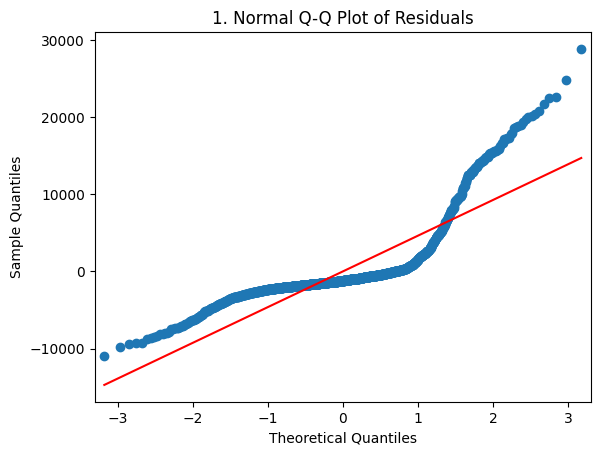

In [ ]:
qqplot(residuals, line='s', ax=plt.gca())
plt.title('1. Normal Q-Q Plot of Residuals')

##### Goodness of Fit Graph

Here we can analyze that the model fits very well in the lower end of the values but underperforms on the higher values.

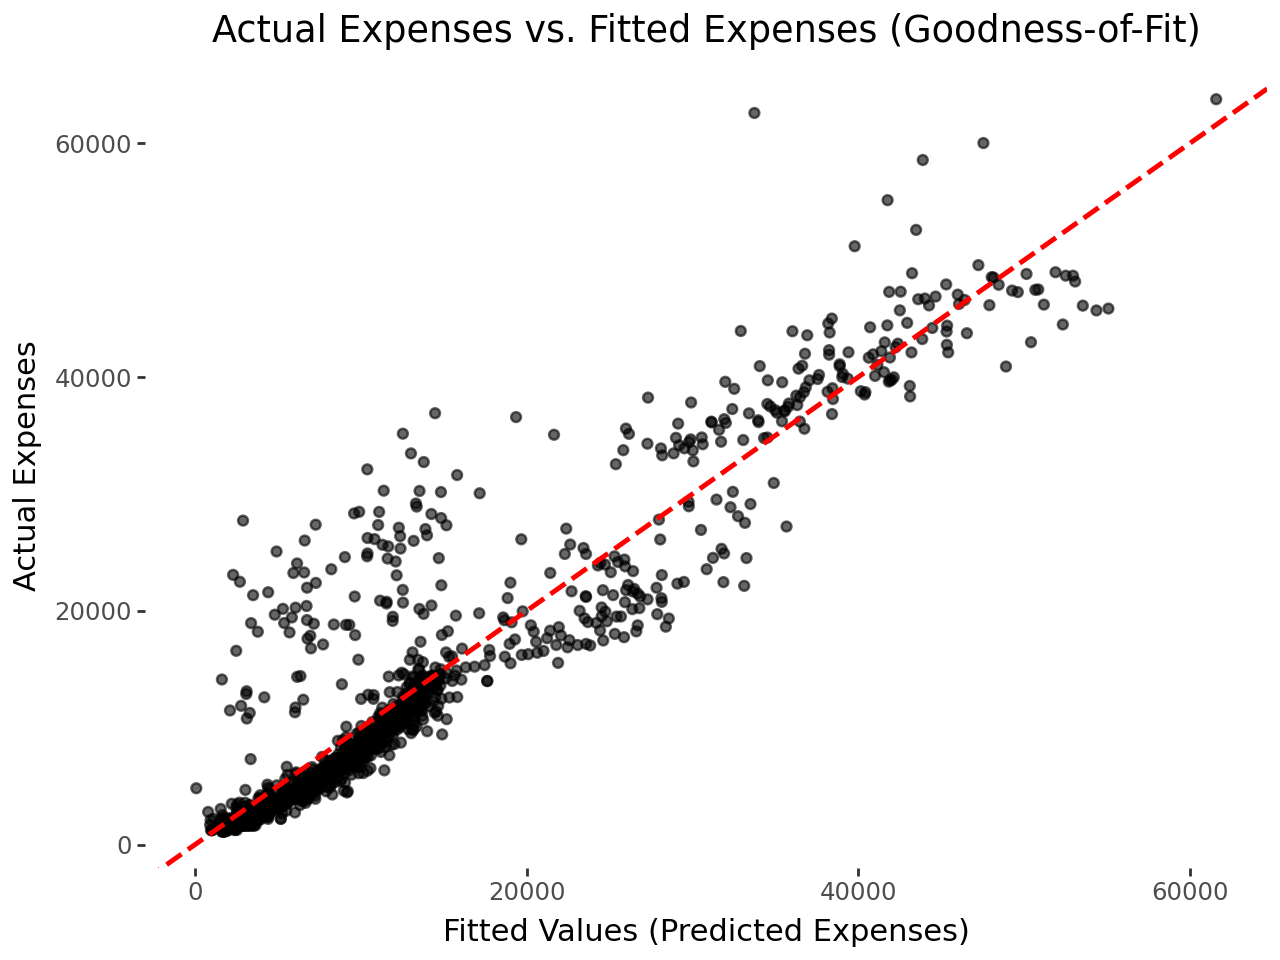

In [ ]:
graph_4 = (
    ggplot(plot_data, aes(x='fitted_values', y='actual_values'))
    + geom_point(alpha=0.6)
    + geom_abline(intercept=0, slope=1, color='red', linetype='dashed', size=1)
      + theme(
      panel_grid_major=element_blank(),
      panel_grid_minor=element_blank(),
      panel_border=element_blank(),
      panel_background=element_blank())
     + labs(
        title='Actual Expenses vs. Fitted Expenses (Goodness-of-Fit)',
        x='Fitted Values (Predicted Expenses)',
        y='Actual Expenses'
    ))
graph_4

Residual Plot vs Fitted Values

Here we test the randmoness of the residuals, they should be scatters and close to 0 without a clear pattern. However, we can again see a slight trend in the higher end of the values, meaning it is not picking up the signal well enough.

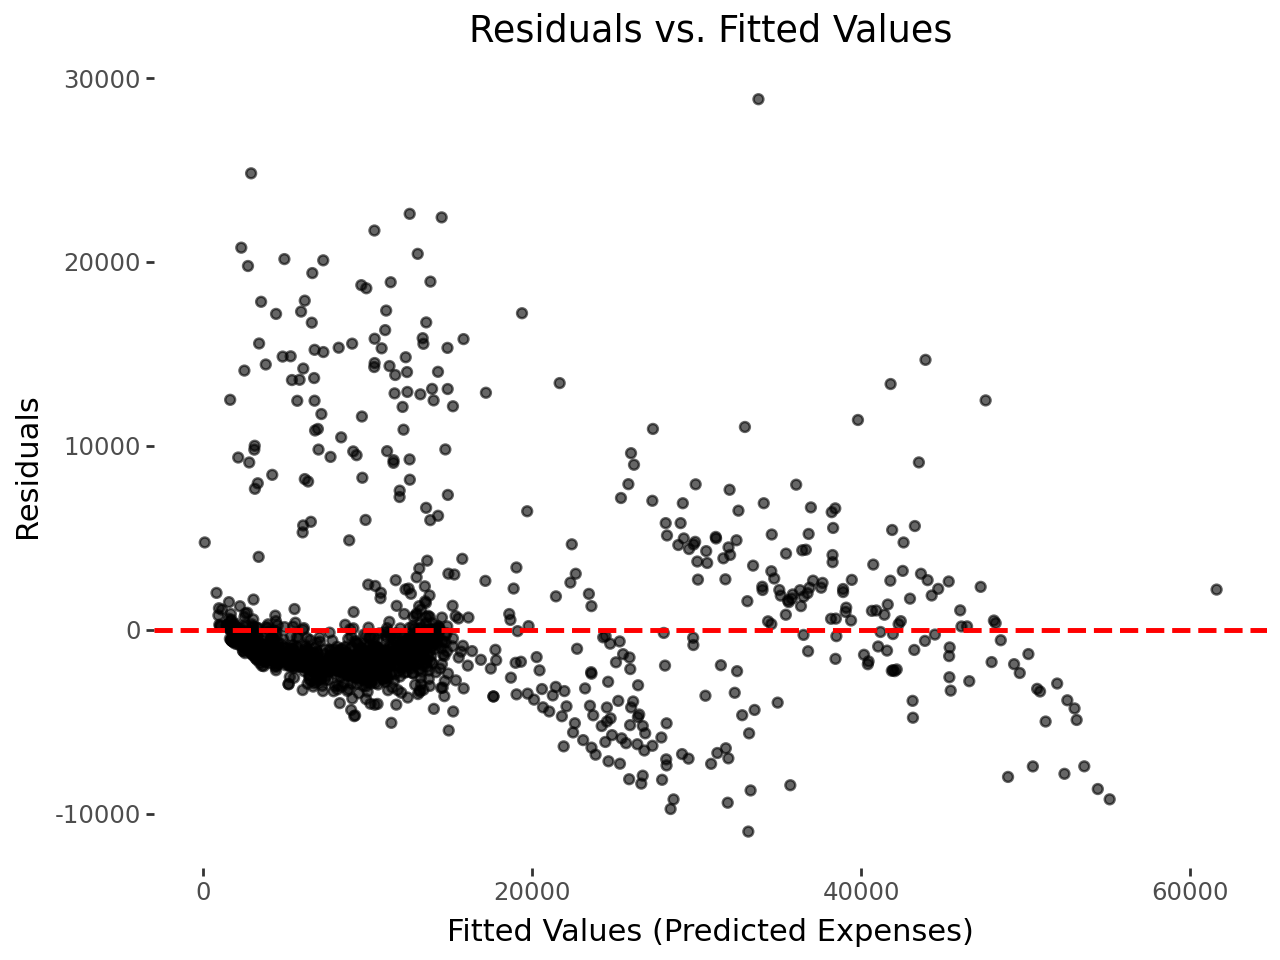

In [ ]:
graph_5 = (
    ggplot(plot_data, aes(x='fitted_values', y='residuals'))
    + geom_point(alpha=0.6)
    + geom_abline(intercept=0, slope=0, color='red', linetype='dashed', size=1)
    + labs(
        title='Residuals vs. Fitted Values',
        x='Fitted Values (Predicted Expenses)',
        y='Residuals'
    )
      + theme(
      panel_grid_major=element_blank(),
      panel_grid_minor=element_blank(),
      panel_border=element_blank(),
      panel_background=element_blank()))
graph_5

Heteroscedasticity

In this graph we can conclude that the equal variance is not being fully complied also, having in the higher values a cone like shape.

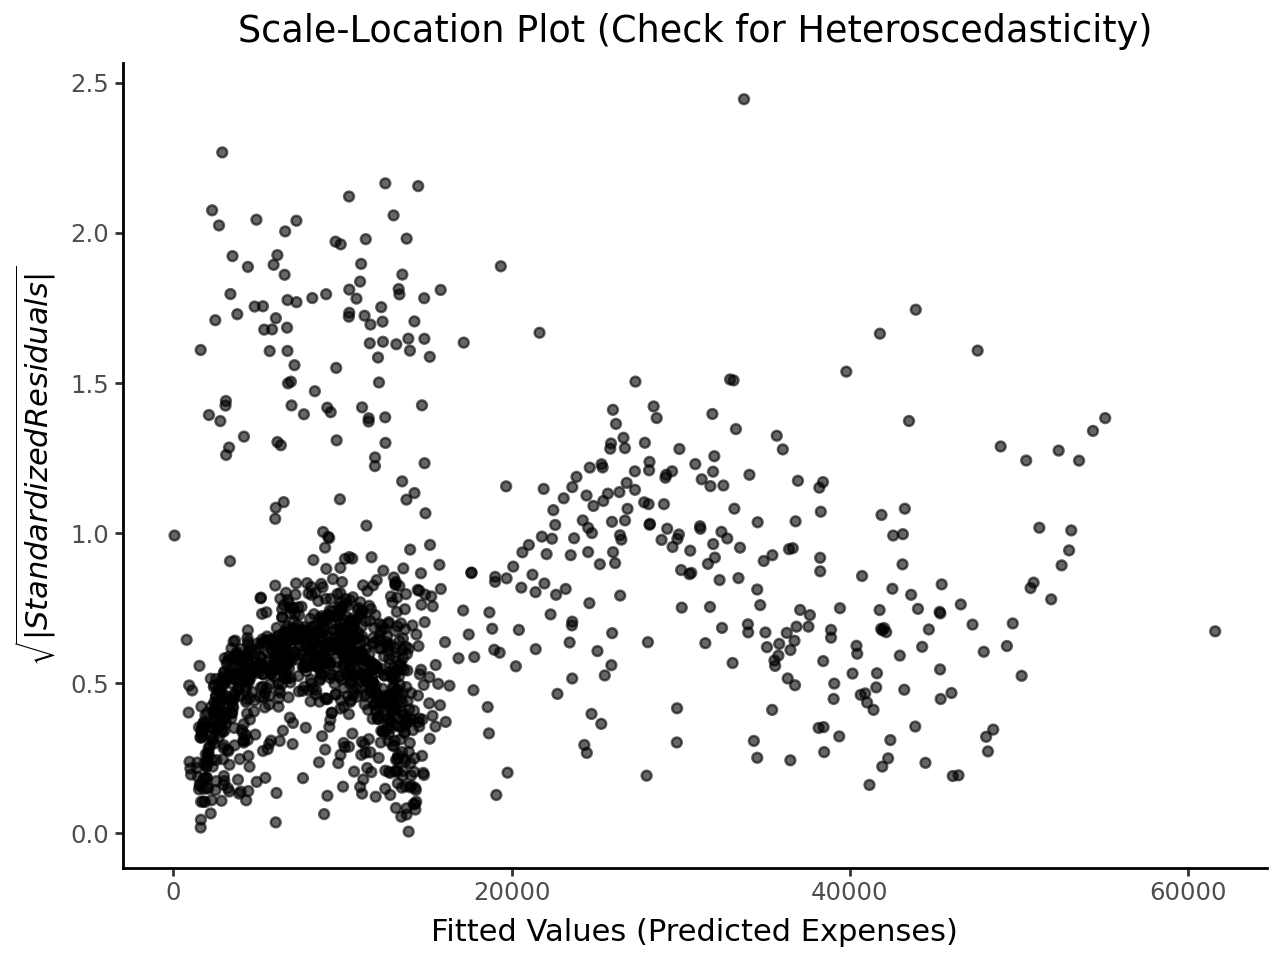

In [ ]:
standarized_residuals = final_model.resid_pearson
plot_data['Square Root of sr'] = np.sqrt(np.abs(standarized_residuals))
graph_6 = (
    ggplot(plot_data, aes(x='fitted_values', y='Square Root of sr'))
    + geom_point(alpha=0.6)
    + labs(
        title='Scale-Location Plot (Check for Heteroscedasticity)',
        x='Fitted Values (Predicted Expenses)',
        y='$\sqrt{|Standardized Residuals|}$'
    )
    + theme_classic()
)
graph_6

In [ ]:
mae = mean_absolute_error(plot_data['actual_values'], plot_data['fitted_values'])
mse = mean_squared_error(plot_data['actual_values'], plot_data['fitted_values'])
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(plot_data['actual_values'], plot_data['fitted_values'])
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print('MAPE:', mape)

MAE: 2801.9487852698535
MSE: 21457697.7144709
RMSE: 4632.245428997788
MAPE: 0.27401234045405154


## XGBoosting

### Data Preparation

In [ ]:
df = pd.read_csv("medical_insurance.csv")
df_dumb = pd.get_dummies(df, dtype = int, drop_first = True)
df_dumb

,age,bmi,children,expenses,premium,gender_male,smoker_yes,discount_eligibility_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,168.8492,0,1,1,0,0,1
1,18,33.8,1,1725.55,17.2555,1,0,0,0,1,0
2,28,33.0,3,4449.46,44.4946,1,0,0,0,1,0
3,33,22.7,0,21984.47,439.6894,1,0,0,1,0,0
4,32,28.9,0,3866.86,77.3372,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,212.0110,1,0,0,1,0,0
1334,18,31.9,0,2205.98,22.0598,0,0,0,0,0,0
1335,18,36.9,0,1629.83,16.2983,0,0,0,0,1,0
1336,21,25.8,0,2007.95,20.0795,0,0,0,0,0,1


Separate the feature columnbs from the response columns and split them into train and test, leaving 80 percent of the data to train the model.

In [ ]:
y = df_dumb['expenses']
X = df_dumb.drop(columns = ['expenses', 'premium'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# **Models and Hyperparameter Tuning**

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=100
    )

In [ ]:
model.fit(X_train, y_train,eval_set = watchlist)
y_pred = model.predict(X_test)

[0]	validation_0-rmse:11018.22760
[1]	validation_0-rmse:10112.55757
[2]	validation_0-rmse:9311.05324
[3]	validation_0-rmse:8602.23029
[4]	validation_0-rmse:7967.66783
[5]	validation_0-rmse:7416.69448
[6]	validation_0-rmse:6924.06503
[7]	validation_0-rmse:6494.12965
[8]	validation_0-rmse:6117.32926
[9]	validation_0-rmse:5781.64707
[10]	validation_0-rmse:5494.55775
[11]	validation_0-rmse:5244.55349
[12]	validation_0-rmse:5020.96641
[13]	validation_0-rmse:4822.02701
[14]	validation_0-rmse:4653.78852
[15]	validation_0-rmse:4514.55712
[16]	validation_0-rmse:4391.10437
[17]	validation_0-rmse:4282.49744
[18]	validation_0-rmse:4168.71780
[19]	validation_0-rmse:4079.85167
[20]	validation_0-rmse:3995.11355
[21]	validation_0-rmse:3925.35805
[22]	validation_0-rmse:3857.24053
[23]	validation_0-rmse:3800.42129
[24]	validation_0-rmse:3742.92999
[25]	validation_0-rmse:3698.33789
[26]	validation_0-rmse:3655.24761
[27]	validation_0-rmse:3614.89409
[28]	validation_0-rmse:3580.54202
[29]	validation_0-rmse

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2444.1018179184643
MSE: 17711302.8299521
RMSE: 4208.479871634424
R²: 0.8841607627193859


Second - Add in reg lamdba and reg alpha

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=100,
        reg_lambda = 2,
        reg_alpha = 2
    )

In [ ]:
model.fit(X_train, y_train,eval_set = watchlist)
y_pred = model.predict(X_test)

[0]	validation_0-rmse:11035.51084
[1]	validation_0-rmse:10145.71470
[2]	validation_0-rmse:9354.77651
[3]	validation_0-rmse:8650.37003
[4]	validation_0-rmse:8024.42625
[5]	validation_0-rmse:7469.37807
[6]	validation_0-rmse:6987.79533
[7]	validation_0-rmse:6561.24010
[8]	validation_0-rmse:6186.92166
[9]	validation_0-rmse:5859.04443
[10]	validation_0-rmse:5571.94603
[11]	validation_0-rmse:5320.93269
[12]	validation_0-rmse:5106.59981
[13]	validation_0-rmse:4923.20259
[14]	validation_0-rmse:4751.19960
[15]	validation_0-rmse:4601.46945
[16]	validation_0-rmse:4473.59915
[17]	validation_0-rmse:4365.19612
[18]	validation_0-rmse:4267.79802
[19]	validation_0-rmse:4187.99639
[20]	validation_0-rmse:4103.25845
[21]	validation_0-rmse:4034.23857
[22]	validation_0-rmse:3979.74844
[23]	validation_0-rmse:3926.70752
[24]	validation_0-rmse:3874.58051
[25]	validation_0-rmse:3827.44024
[26]	validation_0-rmse:3786.10872
[27]	validation_0-rmse:3752.14996
[28]	validation_0-rmse:3717.58074
[29]	validation_0-rmse

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2457.564558797808
MSE: 17206355.304350857
RMSE: 4148.054399878437
R²: 0.8874633281372988


Third - Tune reg lamdba and reg alpha, increase estimators

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=1000,
        reg_lambda = 1,
        reg_alpha = 1
    )

In [ ]:
model.fit(X_train, y_train,eval_set = watchlist)
y_pred = model.predict(X_test)

[0]	validation_0-rmse:11018.22935
[1]	validation_0-rmse:10112.56101
[2]	validation_0-rmse:9311.05838
[3]	validation_0-rmse:8602.23656
[4]	validation_0-rmse:7967.67585
[5]	validation_0-rmse:7416.70389
[6]	validation_0-rmse:6924.07577
[7]	validation_0-rmse:6494.14171
[8]	validation_0-rmse:6117.34223
[9]	validation_0-rmse:5781.66109
[10]	validation_0-rmse:5494.57249
[11]	validation_0-rmse:5244.56945
[12]	validation_0-rmse:5020.98346
[13]	validation_0-rmse:4822.04499
[14]	validation_0-rmse:4653.80771
[15]	validation_0-rmse:4514.57719
[16]	validation_0-rmse:4391.12488
[17]	validation_0-rmse:4282.51877
[18]	validation_0-rmse:4168.74040
[19]	validation_0-rmse:4079.87535
[20]	validation_0-rmse:3995.13811
[21]	validation_0-rmse:3925.38275
[22]	validation_0-rmse:3857.26655
[23]	validation_0-rmse:3800.44801
[24]	validation_0-rmse:3742.95752
[25]	validation_0-rmse:3698.36567
[26]	validation_0-rmse:3655.27589
[27]	validation_0-rmse:3614.92274
[28]	validation_0-rmse:3580.57118
[29]	validation_0-rmse

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2854.7801402624327
MSE: 23550796.937582824
RMSE: 4852.9163332559965
R²: 0.8459680588834699


Fourth - reg lamdba and reg alpha to 0

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=1000,
        reg_lambda = 0,
        reg_alpha = 0
    )

In [ ]:
model.fit(X_train, y_train,eval_set = watchlist)
y_pred = model.predict(X_test)

[0]	validation_0-rmse:10980.22519
[1]	validation_0-rmse:10037.13458
[2]	validation_0-rmse:9202.97621
[3]	validation_0-rmse:8463.13903
[4]	validation_0-rmse:7810.03850
[5]	validation_0-rmse:7230.92547
[6]	validation_0-rmse:6726.70392
[7]	validation_0-rmse:6287.26197
[8]	validation_0-rmse:5890.00816
[9]	validation_0-rmse:5551.42793
[10]	validation_0-rmse:5260.74752
[11]	validation_0-rmse:5005.71320
[12]	validation_0-rmse:4776.43508
[13]	validation_0-rmse:4573.60400
[14]	validation_0-rmse:4383.54188
[15]	validation_0-rmse:4232.58965
[16]	validation_0-rmse:4111.65088
[17]	validation_0-rmse:3989.98549
[18]	validation_0-rmse:3879.43582
[19]	validation_0-rmse:3786.59264
[20]	validation_0-rmse:3712.08074
[21]	validation_0-rmse:3649.75309
[22]	validation_0-rmse:3587.65836
[23]	validation_0-rmse:3536.36009
[24]	validation_0-rmse:3491.16221
[25]	validation_0-rmse:3439.77652
[26]	validation_0-rmse:3407.59806
[27]	validation_0-rmse:3374.40713
[28]	validation_0-rmse:3347.13143
[29]	validation_0-rmse

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2921.886175081623
MSE: 25769578.747793477
RMSE: 5076.374567325925
R²: 0.8314563092366711


Fifth - Random Parameters

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=500
    )

In [ ]:
model.fit(X_train, y_train, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2836.407359108996
MSE: 21961803.96960847
RMSE: 4686.34228045802
R²: 0.8563607293279685


Sixth - Set max depth (reg lamdba and reg alpha not provided since were set to 0, defaults to 0)

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=500,
        max_depth = 4
    )

8th - Change max depth and set min child weight

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .1,
        n_estimators=500,
        max_depth = 3,
        min_child_weight = 3
    )

9th - Adjust learning rate

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .01,
        n_estimators=1000,
        max_depth = 3,
        min_child_weight = 3
    )

10th - Trying new reg lambda values

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .01,
        n_estimators=1000,
        max_depth = 3,
        min_child_weight = 3,
        reg_lambda = 6,
        reg_alpha = 0
    )

In [ ]:
model.fit(X_train, y_train, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2149.698320931961
MSE: 14046817.655008111
RMSE: 3747.9084373831906
R²: 0.9081280096106626


11th try - Different learning rate and iterations

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .005,
        n_estimators=1500,
        max_depth = 3,
        min_child_weight = 3,
        reg_lambda = 6,
        reg_alpha = 0
    )

In [ ]:
model.fit(X_train, y_train, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2147.1807127995276
MSE: 13749775.208116813
RMSE: 3708.0689324926
R²: 0.9100707899254831


12th - add in subsample and col sample by tree - adjust sampling within trees in the model

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .005,
        n_estimators=1500,
        max_depth = 3,
        min_child_weight = 3,
        reg_lambda = 6,
        reg_alpha = 0,
        subsample = 0.9,
        colsample_bytree = 0.9
    )

In [ ]:
model.fit(X_train, y_train, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2143.3238199626862
MSE: 13767319.703928795
RMSE: 3710.4338969895143
R²: 0.9099560416750102


13th - Best - Adding in tree method = hist

In [ ]:
watchlist = [(X_train, y_train)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .005,
        n_estimators=1500,
        max_depth = 3,
        min_child_weight = 3,
        reg_lambda = 6,
        reg_alpha = 2,
        subsample = 0.9,
        colsample_bytree = 0.9,
        tree_method = 'hist'
    )

In [ ]:
model.fit(X_train, y_train, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2143.172074721607
MSE: 13766811.791337846
RMSE: 3710.3654525313063
R²: 0.9099593636331804


# **Feature Importance**

In [ ]:
df1 = df_dumb.drop(columns = 'premium', axis = 1)

In [ ]:
feature_cols = [c for c in list(df1.columns[:220]) if c != 'expenses']
feat_map = {f"f{i}": feature_cols[i] for i in range(len(feature_cols))}

In [ ]:
imp_gain       = model.get_booster().get_score(importance_type='gain')
imp_weight     = model.get_booster().get_score(importance_type='weight')
imp_cover      = model.get_booster().get_score(importance_type='cover')
imp_total_gain = model.get_booster().get_score(importance_type='total_gain')
imp_total_cov  = model.get_booster().get_score(importance_type='total_cover')
def to_df(d, kind):
    if not d:
        return pd.DataFrame(columns=['feature_code','feature','kind','value'])
    df = (pd.Series(d).rename_axis('feature_code')
                      .reset_index(name='value'))
    df['feature'] = df['feature_code'].map(feat_map).fillna(df['feature_code'])
    df['kind'] = kind
    return df
imp_long = pd.concat([
    to_df(imp_gain, 'gain'),
    to_df(imp_weight, 'weight'),
    to_df(imp_cover, 'cover'),
    to_df(imp_total_gain, 'total_gain'),
    to_df(imp_total_cov, 'total_cover'),
], ignore_index=True)
imp_gain

{'age': 409777760.0,
 'bmi': 613958080.0,
 'children': 96880136.0,
 'gender_male': 42690900.0,
 'smoker_yes': 7645421056.0,
 'discount_eligibility_yes': 8144546816.0,
 'region_northwest': 41922848.0,
 'region_southeast': 46820528.0,
 'region_southwest': 69907304.0}

In [ ]:
imp_wide = (imp_long
            .pivot_table(index=['feature_code','feature'], columns='kind', values='value', aggfunc='first')
            .reset_index())
imp_wide['total_sum'] = imp_wide['total_gain'].fillna(0) + imp_wide['total_cover'].fillna(0)
imp_wide.sort_values('total_sum', ascending=False).head()

kind,feature_code,feature,cover,gain,total_cover,total_gain,weight,total_sum
8,smoker_yes,smoker_yes,798.453552,7.645421e+09,825601.0,7.905365e+12,1034.0,7.905366e+12
1,bmi,bmi,357.343903,6.139581e+08,1148146.0,1.972647e+12,3213.0,1.972649e+12
0,age,age,386.043579,4.097778e+08,1275874.0,1.354315e+12,3305.0,1.354317e+12
3,discount_eligibility_yes,discount_eligibility_yes,669.449158,8.144547e+09,78995.0,9.610565e+11,118.0,9.610566e+11
2,children,children,398.567261,9.688014e+07,506579.0,1.231347e+11,1271.0,1.231352e+11


In [ ]:
imp_wide = (imp_long
            .pivot_table(index=['feature_code','feature'], columns='kind', values='value', aggfunc='first')
            .reset_index())
scaler1 = StandardScaler()
scaler2 = StandardScaler()
imp_wide['total_sum'] = scaler1.fit_transform(imp_wide['total_gain'].values.reshape(-1, 1)) + scaler2.fit_transform(imp_wide['total_cover'].values.reshape(-1, 1))
imp_wide.sort_values('total_sum', ascending=False).head()

kind,feature_code,feature,cover,gain,total_cover,total_gain,weight,total_sum
8,smoker_yes,smoker_yes,798.453552,7.645421e+09,825601.0,7.905365e+12,1034.0,3.468832
0,age,age,386.043579,4.097778e+08,1275874.0,1.354315e+12,3305.0,1.727212
1,bmi,bmi,357.343903,6.139581e+08,1148146.0,1.972647e+12,3213.0,1.706131
2,children,children,398.567261,9.688014e+07,506579.0,1.231347e+11,1271.0,-0.458329
3,discount_eligibility_yes,discount_eligibility_yes,669.449158,8.144547e+09,78995.0,9.610565e+11,118.0,-1.040710


In [ ]:
top_feats = (imp_wide.sort_values('total_sum', ascending=False)
                        .head(5)['feature'].tolist())
top_feats

['smoker_yes', 'age', 'bmi', 'children', 'discount_eligibility_yes']

In [ ]:
plot_long = pd.concat([
    imp_long[imp_long['kind'].isin(['weight','total_gain','total_cover'])],
    imp_wide[['feature_code','feature','total_sum']].assign(kind='total_sum').rename(columns={'total_sum':'value'})
], ignore_index=True)
plot_long = plot_long[plot_long['feature'].isin(top_feats)].copy()
plot_long

,feature_code,value,feature,kind
0,age,3.305000e+03,age,weight
1,bmi,3.213000e+03,bmi,weight
2,children,1.271000e+03,children,weight
4,smoker_yes,1.034000e+03,smoker_yes,weight
5,discount_eligibility_yes,1.180000e+02,discount_eligibility_yes,weight
9,age,1.354315e+12,age,total_gain
10,bmi,1.972647e+12,bmi,total_gain
11,children,1.231347e+11,children,total_gain
13,smoker_yes,7.905365e+12,smoker_yes,total_gain
14,discount_eligibility_yes,9.610565e+11,discount_eligibility_yes,total_gain


In [ ]:
order = (imp_wide.set_index('feature').loc[top_feats, 'total_sum']
                .sort_values(ascending=True).index.tolist())
plot_long['feature'] = pd.Categorical(plot_long['feature'], categories=order, ordered=True)

In [ ]:
plot_long['metric'] = plot_long['kind'].map({
    'weight': 'Weight (split count)',
    'total_gain': 'Total Gain',
    'total_cover': 'Total Cover',
    'total_sum': 'Total Gain + Total Cover'
}).fillna(plot_long['kind'])
plot_long['feature'] = plot_long['feature'].astype('category')
plot_long.head()

,feature_code,value,feature,kind,metric
0,age,3305.0,age,weight,Weight (split count)
1,bmi,3213.0,bmi,weight,Weight (split count)
2,children,1271.0,children,weight,Weight (split count)
4,smoker_yes,1034.0,smoker_yes,weight,Weight (split count)
5,discount_eligibility_yes,118.0,discount_eligibility_yes,weight,Weight (split count)


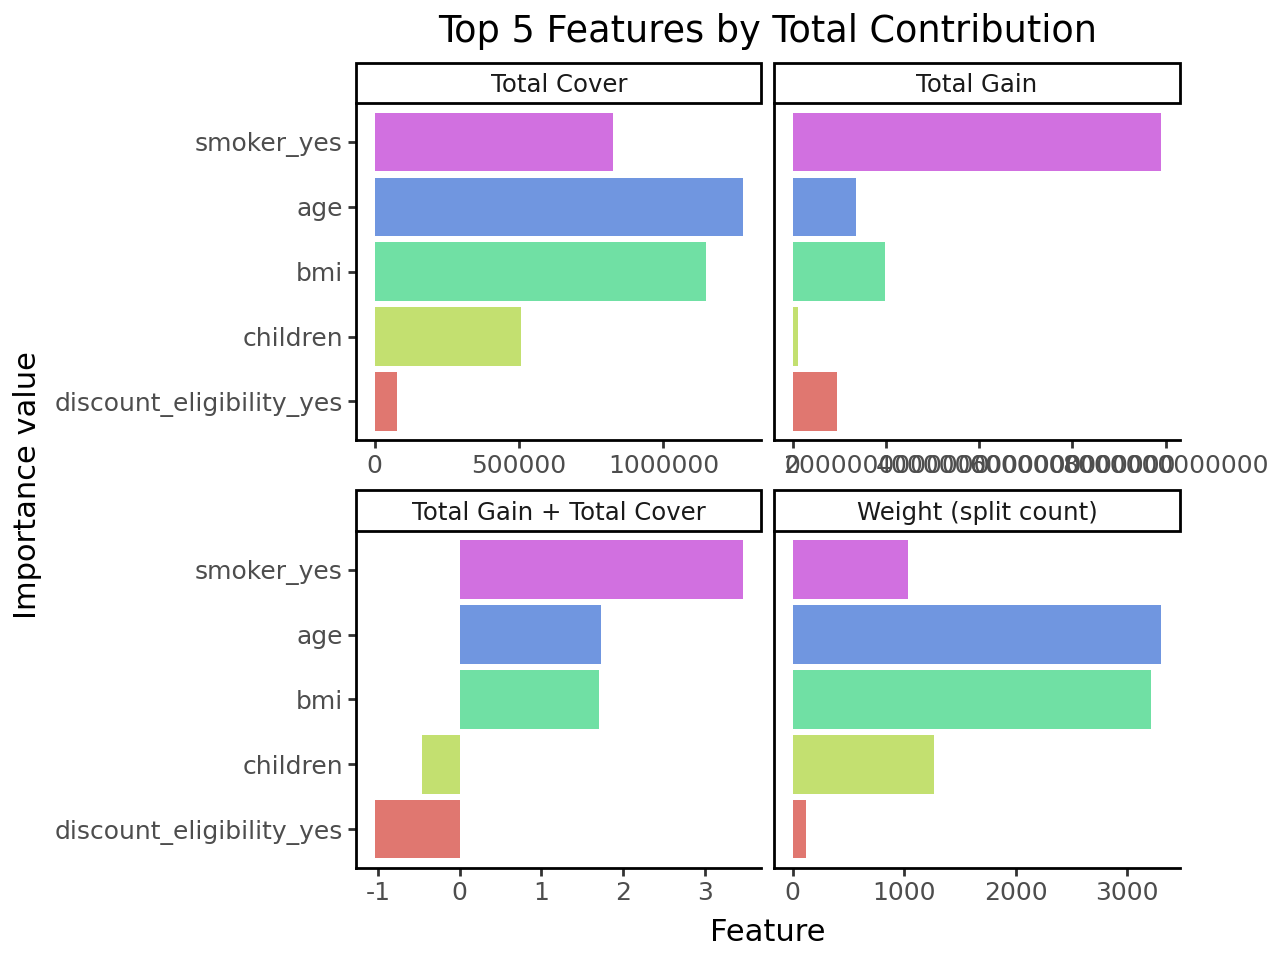

In [ ]:
p_imp = (
    ggplot(plot_long, aes(y='value', x='feature', fill='feature'))
    + geom_col(alpha=0.85)
    + coord_flip()
    + facet_wrap('~metric', scales='free_x', ncol=2)
    + scale_fill_hue()
    + theme_classic()
    + theme(
        legend_position='none',
        axis_text_y=element_text(size=9),
        axis_text_x=element_text(size=9)
    )
    + labs(
        title='Top 5 Features by Total Contribution',
        x='Importance value',
        y='Feature'
    )
)
display(p_imp)

After doing feature selection, it was determined that smoker_yes, age, bmi, children, and discount_eligibility_yes are the mnost imporant features

In [ ]:
df_trimmed = df_dumb[['age','smoker_yes','bmi','children','discount_eligibility_yes','expenses']]
df_trimmed

,age,smoker_yes,bmi,children,discount_eligibility_yes,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,0,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [ ]:
y_tune = df_trimmed['expenses']
X_tune = df_trimmed.drop(columns = 'expenses')
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
watchlist = [(X_train_tune, y_train_tune)]
model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eta = .005,
        n_estimators=1500,
        max_depth = 3,
        min_child_weight = 3,
        reg_lambda = 6,
        reg_alpha = 2,
        subsample = 0.9,
        colsample_bytree = 0.9,
        tree_method = 'hist'
    )

In [ ]:
model.fit(X_train_tune, y_train_tune, eval_set = watchlist, verbose = False)
y_pred = model.predict(X_test_tune)

In [ ]:
mae = mean_absolute_error(y_test_tune, y_pred)
mse = mean_squared_error(y_test_tune, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_tune, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2143.172074721607
MSE: 13766811.791337846
RMSE: 3710.3654525313063
R²: 0.9099593636331804


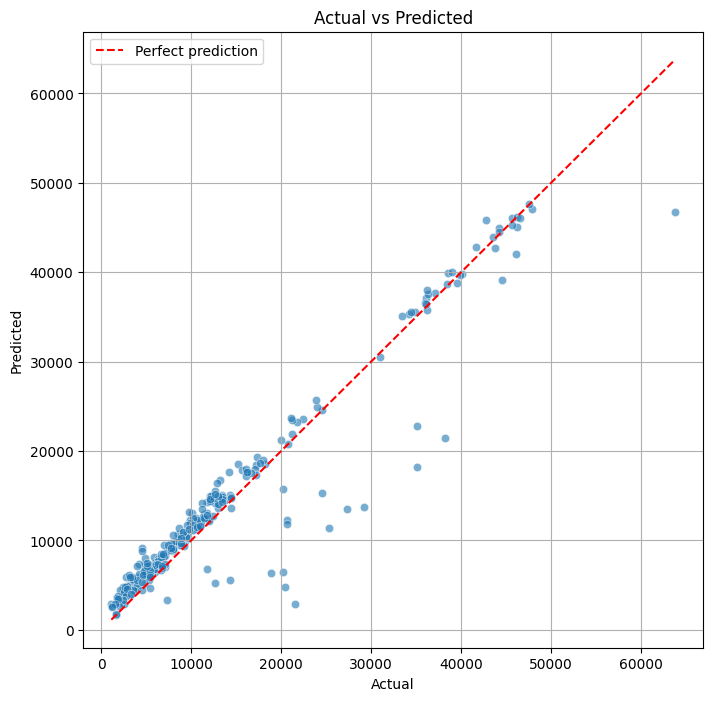

In [ ]:
results = pd.DataFrame({
    'Actual': y_test_tune,
    'Predicted': y_pred
})
plt.figure(figsize=(8, 8))
sns.scatterplot(data=results, x='Actual', y='Predicted', alpha=0.6)
plt.plot([results.Actual.min(), results.Actual.max()],
         [results.Actual.min(), results.Actual.max()],
         color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

Model performs pretty good, most mis calculations are from outliers on the lower end of the spectrum

SHAP Values (Variable Importance)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

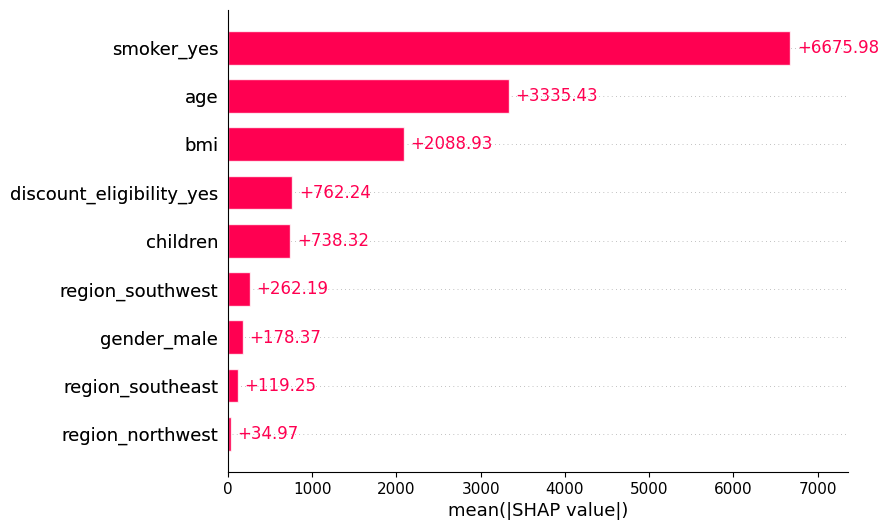

In [ ]:
shap.plots.bar(shap_values, max_display=10)

SHAP values pretty much confirm the variable significance that we saw before. What the value tells us is that out of all the features, someone being a smoker has the largest impact on their expenses, followed by age, bmi,discount_eligibility_yes, and children. The SHAP values tell us smoker is by far the most significant, having nearly double the impact on age as expenses does

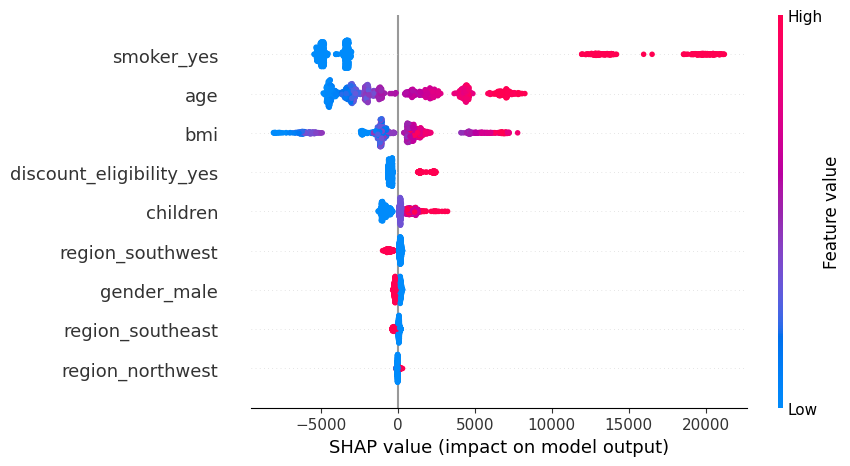

In [ ]:
shap.initjs()
shap.plots.beeswarm(shap_values)

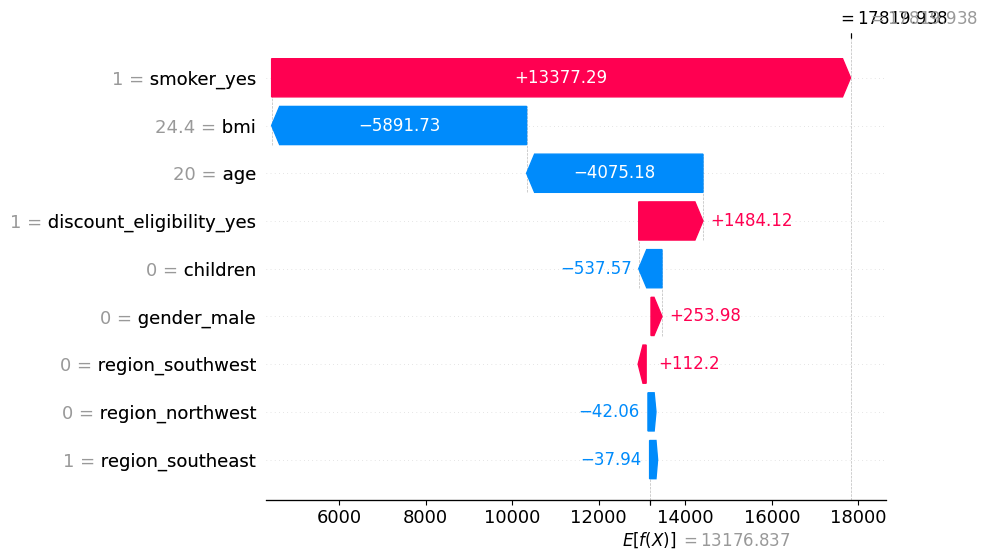

In [ ]:
row_idx = 500
shap.plots.waterfall(shap_values[row_idx], max_display=25)

For row 551, being a smoker increases expenses by 13337, the BMI decreases charges by 5891, and age decrease charges by 4075

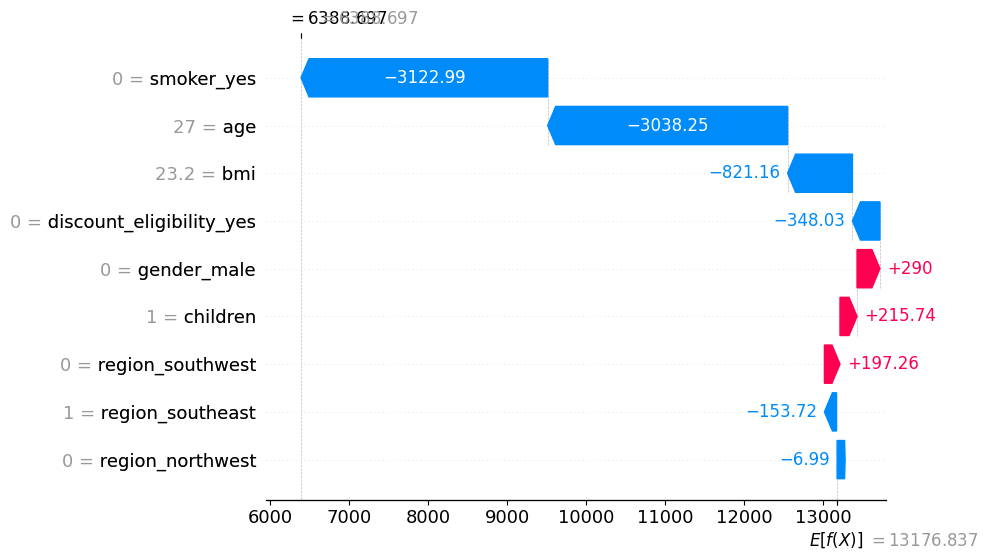

In [ ]:
row_idx = 225
shap.plots.waterfall(shap_values[row_idx], max_display=25)